In [1]:
import sys 
sys.path.append('/home/public/benyuansong') 
from DID import did
from DID import preprocessing
import pandas as pd
from DID import filter

In [2]:
data=pd.read_csv('/home/public/benyuansong/douyin_analyze_sample.csv')

In [3]:
outcome = [
"app_usage_time",
"playing_time",
"watching_duration",
"hot", 
"follow", 
"profile", 
"nearby", 
"f_watch", 
"n_watch", 
"p_watch",
"d_watch",
"photo_upload_cnt",
"photo_comment_cnt",
"photo_like_cnt",
"photo_share_cnt",
"follow_bidirection_count",
"bid_cnt" ]

In [3]:
file = preprocessing.did_preprocessing(data, treatment_col = 'f_out', name_col = 'user_id', date_col = 'p_date')

In [4]:
#is_K2K = True , 是1v1匹配
matched = did.CEM(data, 3, 17, cutpoints = None, grouping = None, is_K2K=True, break_method = 'sturges')

In [8]:
#如果is_K2K=False 需要执行这步
for i in outcome:
    matched[i] = matched[i]*matched['weight']

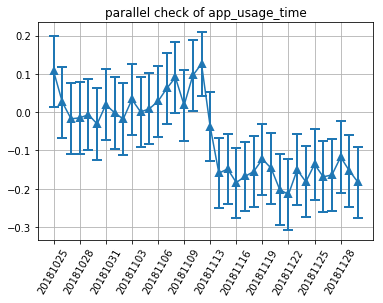

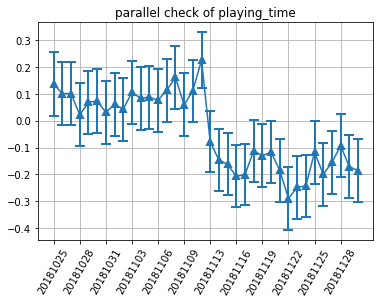

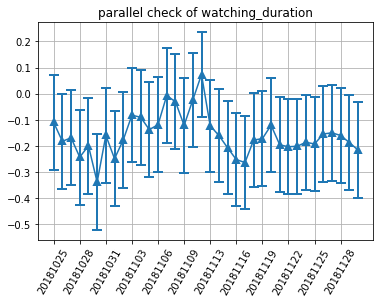

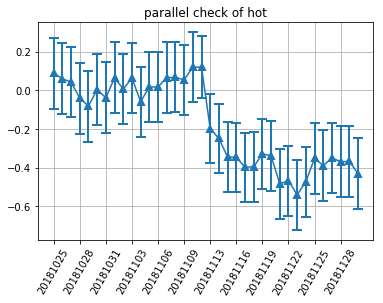

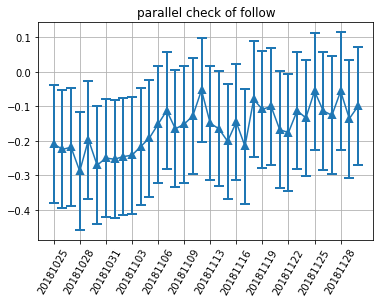

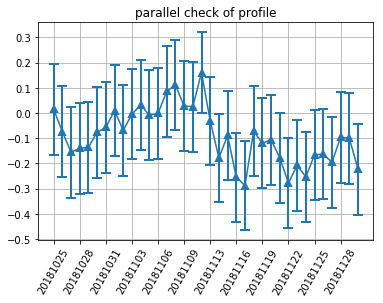

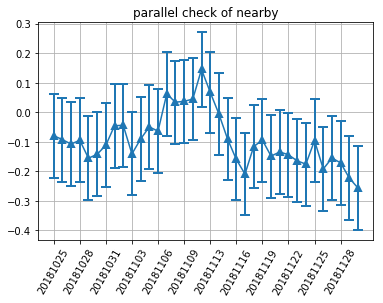

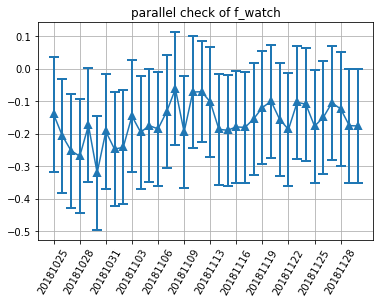

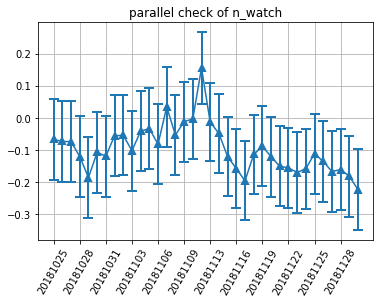

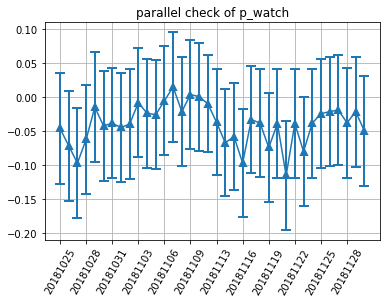

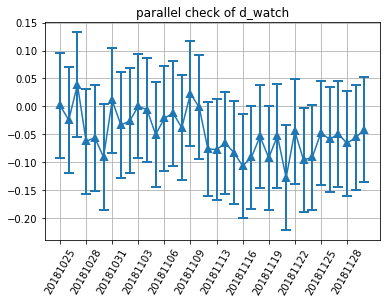

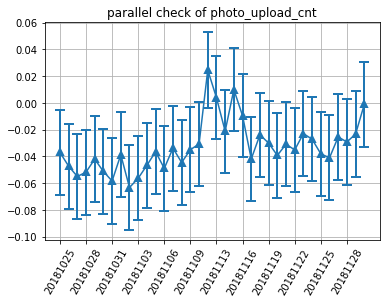

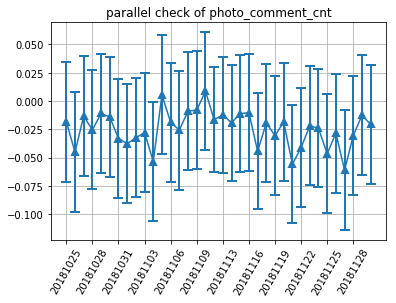

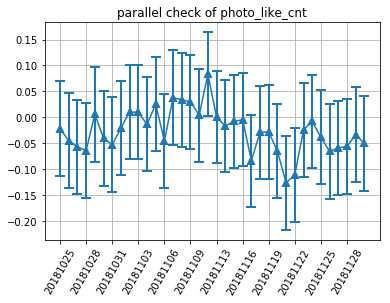

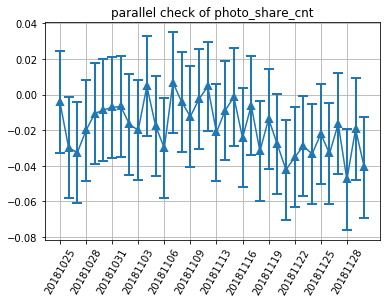

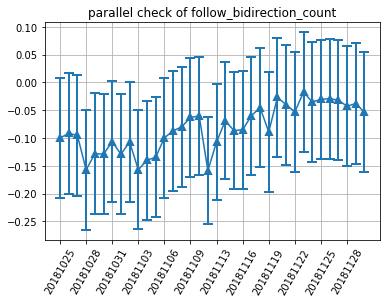

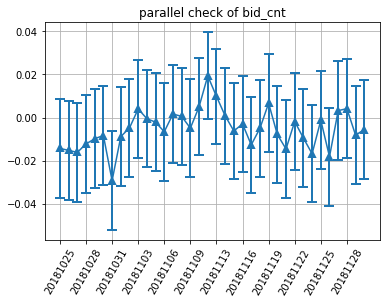

In [10]:
did.check_parallel(matched, outcome, '20181112', step = 3)

In [11]:
did.result(matched, outcome, '20181112')

app_usage_time: -215.21862452848904 1.541776440775563e-26 显著 提升百分比：-7.50%
playing_time: -137.57211875983177 7.790920720855605e-38 显著 提升百分比：-9.48%
watching_duration: -11.475755891699114 0.31155099030394473 不显著 提升百分比：-1.94%
hot: -96.33823601908969 3.5184663359187514e-37 显著 提升百分比：-11.80%
follow: 1.0493248229548169 0.49297555934514425 不显著 提升百分比：0.67%
profile: -21.14913807708442 2.0063249557339025e-06 显著 提升百分比：-5.95%
nearby: -3.9758504690394085 1.5216564207478577e-05 显著 提升百分比：-7.79%
f_watch: -0.37684507425247527 0.9681045243860973 不显著 提升百分比：-0.09%
n_watch: -9.310503003471366 0.002087510912438664 显著 提升百分比：-11.31%
p_watch: -0.5136532382565031 0.640156268995214 不显著 提升百分比：-2.27%
d_watch: -2.832998237364403 0.015798621886882698 显著 提升百分比：-8.98%
photo_upload_cnt: 0.008980465671730569 0.0007085840452068152 显著 提升百分比：12.99%
photo_comment_cnt: -0.0013356432979335438 0.8873424800756139 不显著 提升百分比：-0.48%
photo_like_cnt: -0.06287088570007393 0.05263675728291138 不显著 提升百分比：-3.98%
photo_share_cnt: -0.0040133

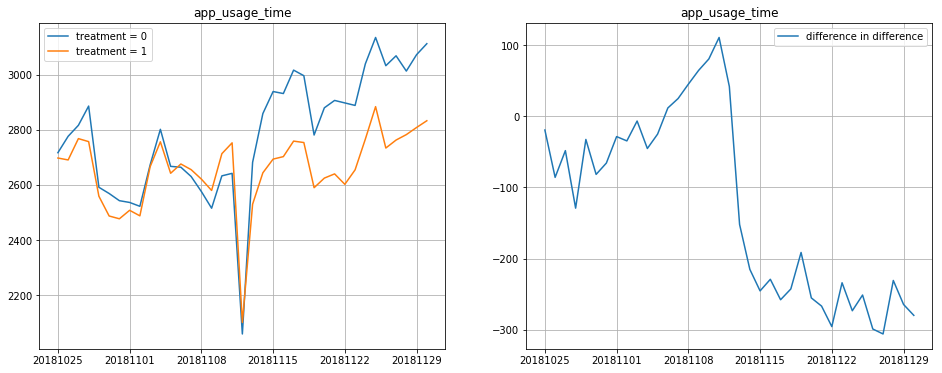

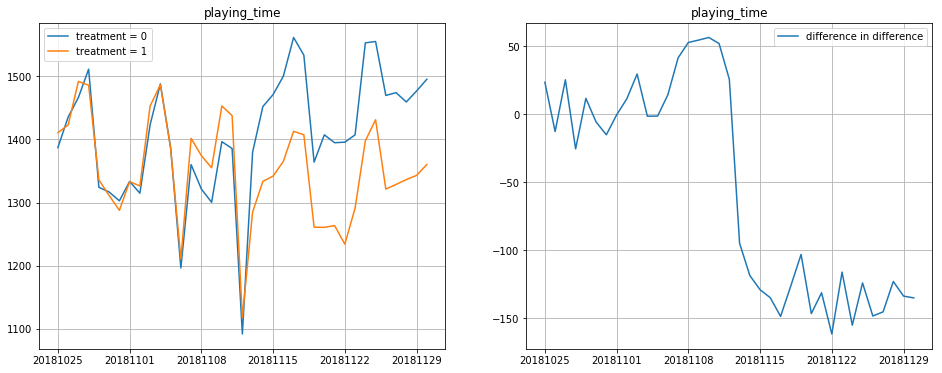

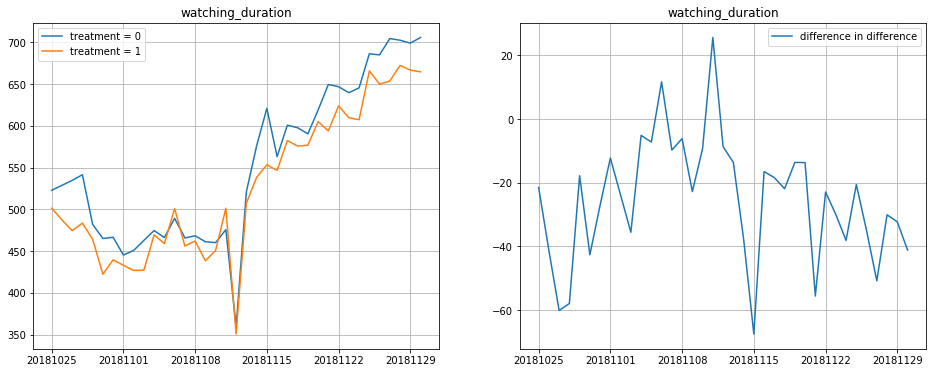

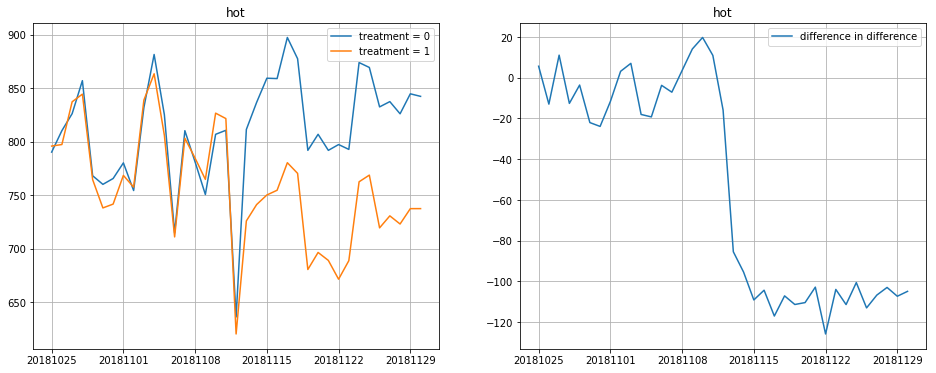

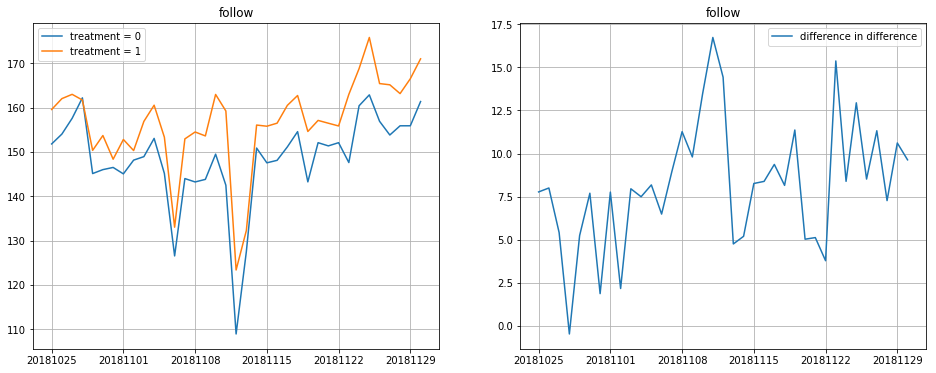

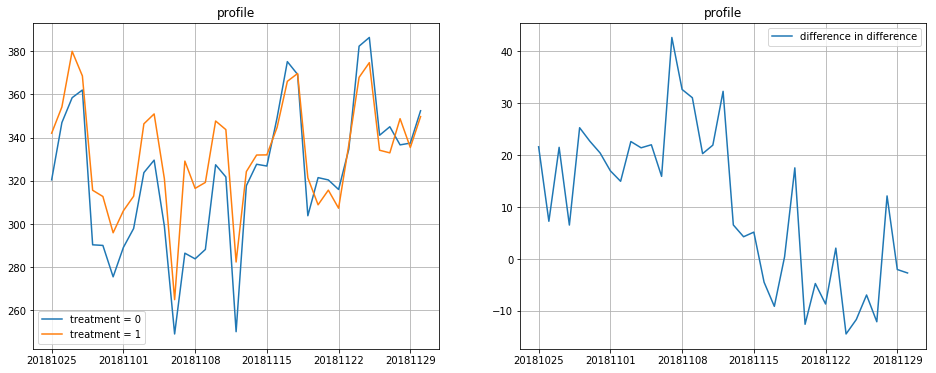

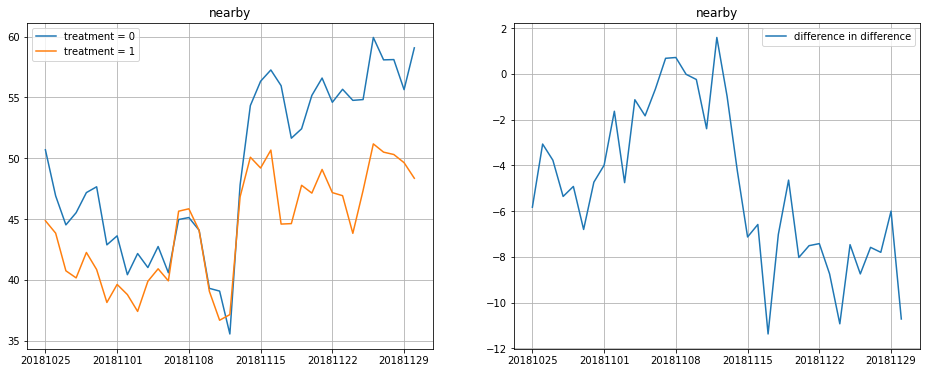

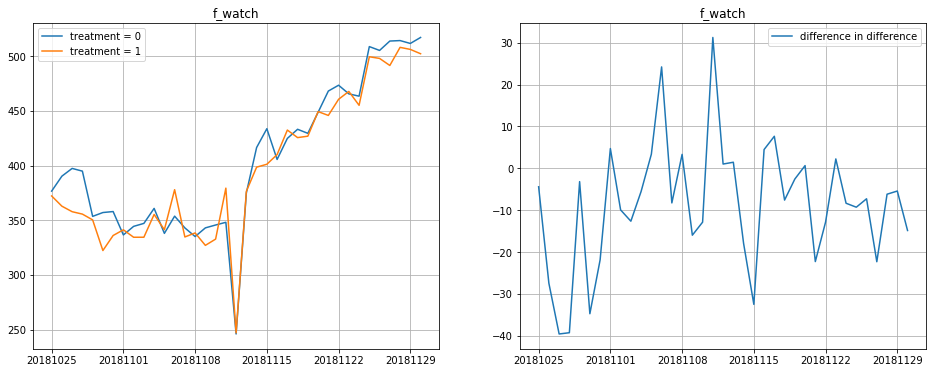

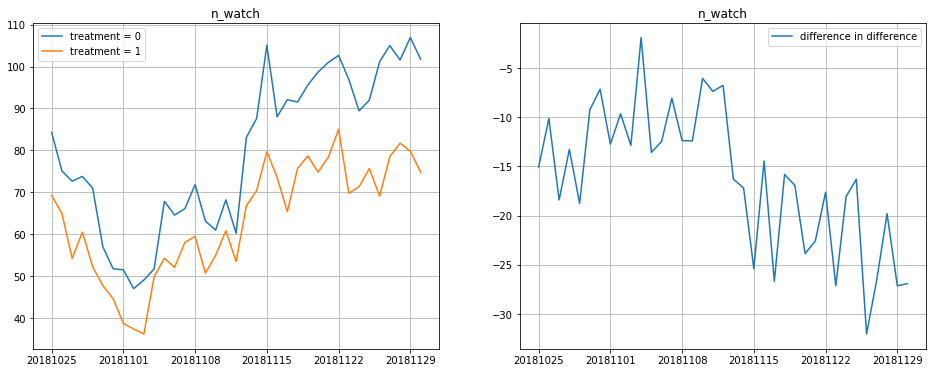

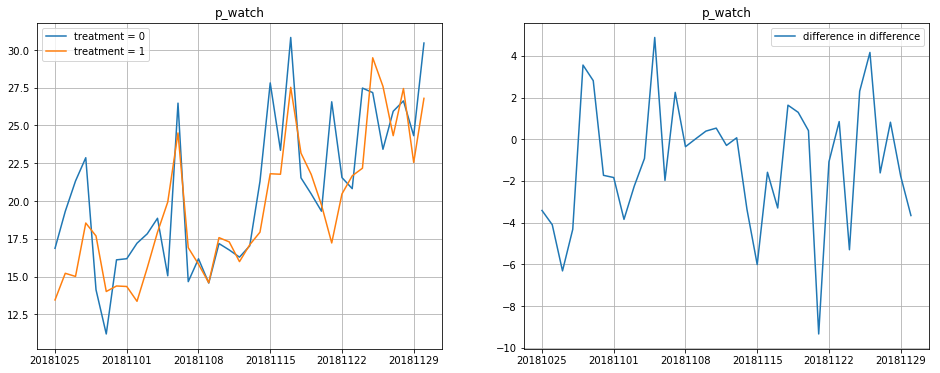

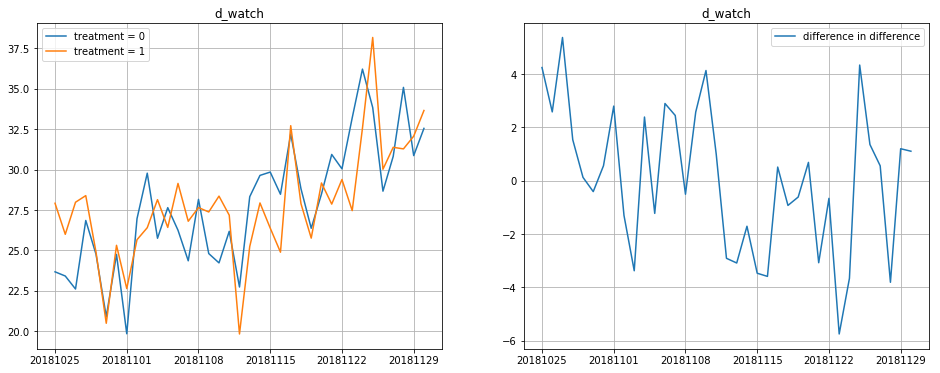

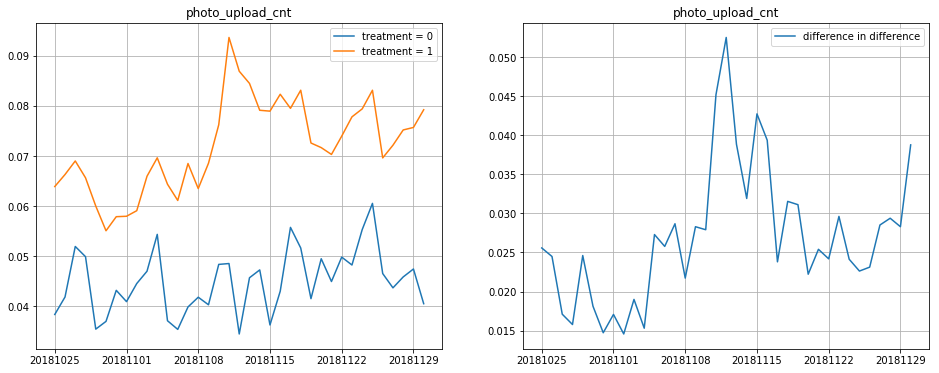

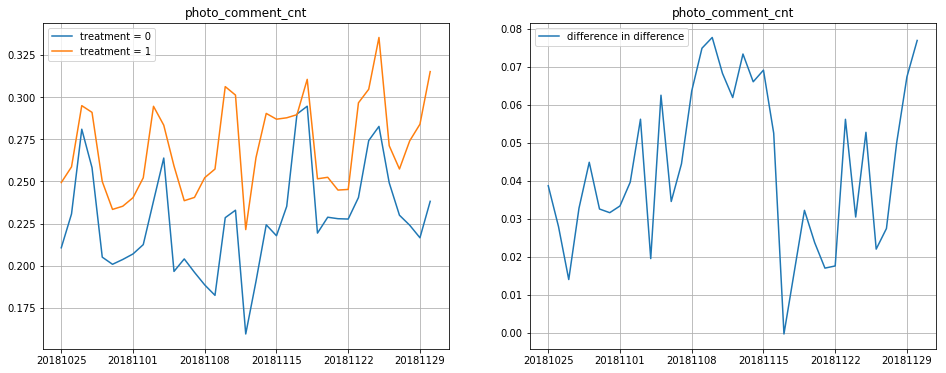

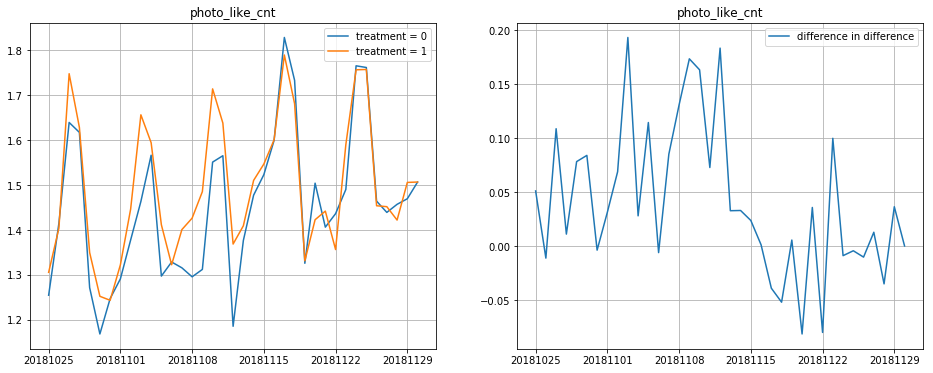

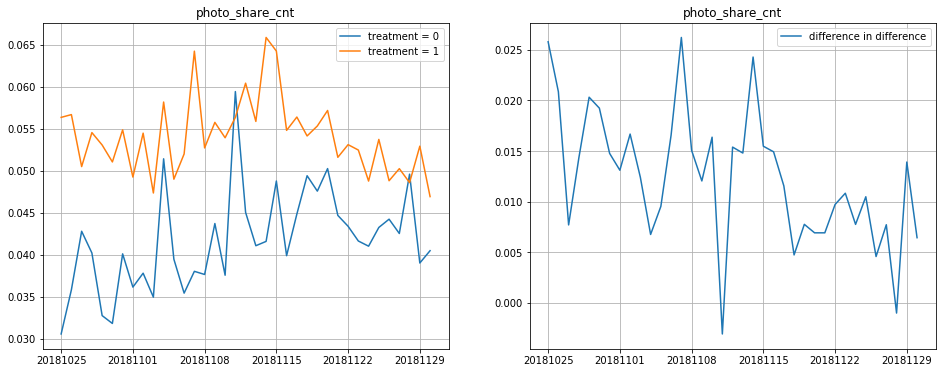

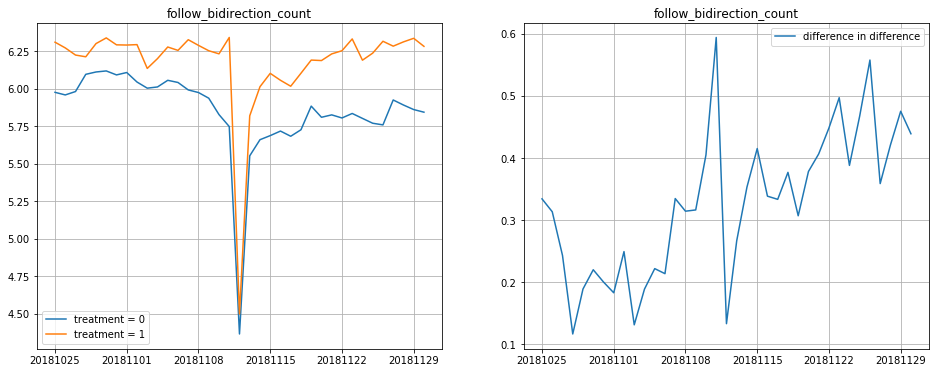

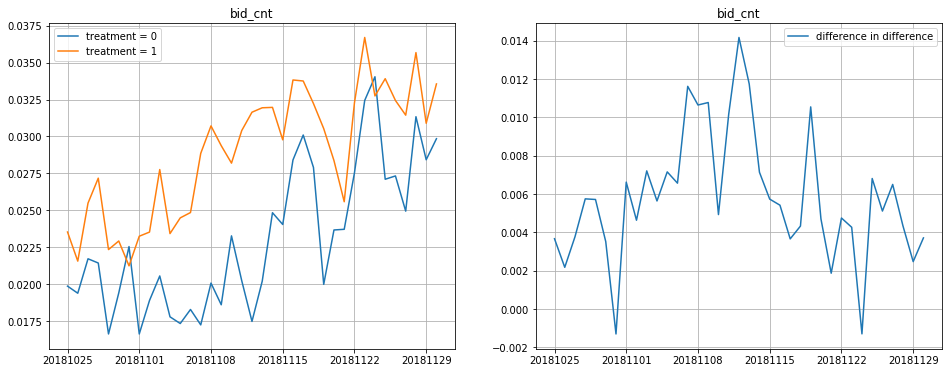

In [12]:
did.plotResult(matched,outcome, step = 7)

In [8]:
matched.columns

Index(['user_id', 'date', 'treatment', 'register_days', 'gender',
       'fre_city_level', 'age_range', 'follow_count', 'fan_count',
       'active_days_in_14d', 'app_usage_time_last30',
       'watching_duration_last30', 'hot_last30', 'follow_last30',
       'nearby_last30', 'profile_last30', 'follow_bidirection_count_last30',
       'bid_cnt_last30', 'app_usage_time', 'playing_time', 'watching_duration',
       'hot', 'follow', 'profile', 'nearby', 'f_watch', 'n_watch', 'p_watch',
       'd_watch', 'photo_upload_cnt', 'photo_comment_cnt', 'photo_like_cnt',
       'photo_share_cnt', 'follow_bidirection_count', 'bid_cnt', 'weight'],
      dtype='object')

In [5]:
did.check_covariate_balance(matched,['register_days','follow_count', 'fan_count',
       'active_days_in_14d', 'app_usage_time_last30',
       'watching_duration_last30', 'hot_last30', 'follow_last30',
       'nearby_last30', 'profile_last30', 'follow_bidirection_count_last30'])

,treated,control,dif,bias
register_days,407.457230,405.192612,2.264618,0.007853
follow_count,54.046190,53.651768,0.394423,0.005225
fan_count,23.292650,21.350544,1.942106,0.006640
active_days_in_14d,8.818515,8.818515,0.000000,0.000000
app_usage_time_last30,1813.973320,1819.382066,5.408746,0.002974
watching_duration_last30,292.265455,302.542088,10.276633,0.013019
hot_last30,553.941396,558.043926,4.102530,0.005523
follow_last30,105.376595,100.610826,4.765769,0.029638
nearby_last30,29.849342,31.667917,1.818575,0.027548
profile_last30,228.263098,212.549662,15.713436,0.043945


In [10]:
matched[(matched.gender=='M')&(matched.treatment==1)]['user_id'].count()

586886